In [1]:
!pip install sqldf

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [125]:
!pip install nltk

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 885.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.9/293.9 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at h

In [305]:
!pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 245.2 kB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


### Import

In [1]:
import pandas as pd
import sqldf
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [ ]:
import nltk
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [306]:
import seaborn as sns

### Load dataset

In [245]:
data = pd.read_csv('dataset.csv')

In [246]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,"2,55",17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,"2,75",17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom


### Data cleaning

In [247]:
data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']]=data[['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']].fillna(0)

In [248]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
data['InvoiceDate']= data['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [249]:
data['CustomerID']=data['CustomerID'].astype(int)
data['UnitPrice'] = data['UnitPrice'].apply(lambda x: x.replace(',', '.'))
data['UnitPrice']=data['UnitPrice'].astype(float)

In [250]:
data['Quantity'] = data['Quantity'].abs()

In [251]:
data['year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['day'] = pd.DatetimeIndex(data['InvoiceDate']).day

In [252]:
data = data.drop_duplicates()

In [253]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12,1


### Answers

<H3 style="color:blue"> Question 1  -  Volume </H3>

<h5 style="color: cadetblue"> Nombre de produits achetés par un client généralement lors d'une dépense </h5>

In [254]:
query_customer = """
    SELECT CustomerID, InvoiceNo, avg(Quantity) as avg_number_products
    FROM data
    group by CustomerID, InvoiceNo
"""

In [255]:
df_customer_mean = sqldf.run(query_customer)

In [256]:
df_customer_mean.head()

,CustomerID,InvoiceNo,avg_number_products
0,0,536414,56.00000
1,0,536544,2.29222
2,0,536545,1.00000
3,0,536546,1.00000
4,0,536547,1.00000


In [257]:
df_customer_mean.groupby('CustomerID').mean().reset_index()

,CustomerID,avg_number_products
0,0,72.531714
1,12346,74215.000000
2,12347,13.799245
3,12348,75.016176
4,12349,8.643836
...,...,...
4368,18280,4.500000
4369,18281,7.714286
4370,18282,7.104762
4371,18283,1.817588


<h5 style="color: cadetblue"> Nombre médian et la moyenne de produits acheté lors d’une dépense, par pays </h5>

In [258]:
volume = pd.DataFrame()

In [259]:
volume['average'] = data.groupby('Country')['Quantity'].mean()

In [260]:
volume['median'] = data.groupby('Country')['Quantity'].apply(np.median)

In [261]:
volume= volume.reset_index()

In [263]:
volume

,Country,average,median
0,Australia,67.372814,24.0
1,Austria,12.306733,10.0
2,Bahrain,19.368421,6.0
3,Belgium,11.272112,10.0
4,Brazil,11.125000,10.0
5,Canada,18.298013,12.0
6,Channel Islands,12.545575,10.0
7,Cyprus,10.448445,6.0
8,Czech Republic,25.000000,24.0
9,Denmark,21.290488,12.0


##### Affichage du graphe en prenant que les top 10

<AxesSubplot: xlabel='Country'>

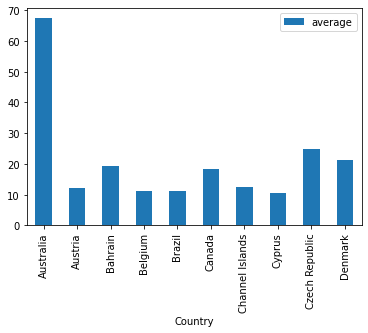

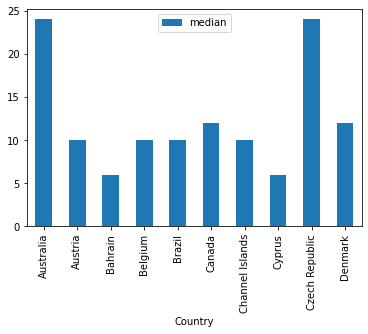

In [42]:
volume.head(10).plot(kind='bar',x='Country', y='average')
volume.head(10).plot(kind='bar',x='Country', y='median')

<H3 style="color:blue"> Question 2  - Montant</H3>

<h5 style="color: cadetblue">  montant dépensé par un client généralement</h5>

In [264]:
query_customer_UnitPrice = """
    SELECT CustomerID, InvoiceNo, avg(UnitPrice*Quantity) as mean
    FROM data
    group by CustomerID, InvoiceNo
"""

In [265]:
df_customer_mean_price = sqldf.run(query_customer_UnitPrice)

In [266]:
df_customer_mean_price.head()

,CustomerID,InvoiceNo,mean
0,0,536414,0.000000
1,0,536544,10.476546
2,0,536545,0.000000
3,0,536546,0.000000
4,0,536547,0.000000


In [293]:
disp = df_customer_mean_price.groupby('CustomerID').mean().reset_index()

In [294]:
disp

,CustomerID,mean
0,0,84.690644
1,12346,77183.600000
2,12347,23.096997
3,12348,66.789412
4,12349,24.076027
...,...,...
4368,18280,18.060000
4369,18281,11.545714
4370,18282,10.444571
4371,18283,2.836907


In [290]:
disp = disp.head(10)

AttributeError: 'AxesSubplot' object has no attribute 'show'

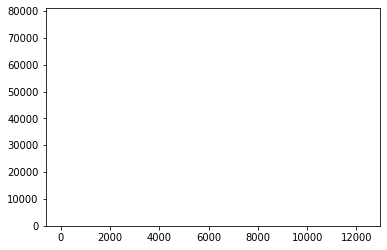

In [285]:
x = disp['CustomerID']
y = disp['mean']

fig, ax = plt.subplots()
ax.bar(x, y)

ax.show()

#### Tracer la distribution

<h5 style="color: cadetblue">  montant moyen et le montant médian d’un panier client, par pays</h5>

In [295]:
data_test = data

In [296]:
montant = pd.DataFrame()

In [297]:
data_test['cart_amount'] = data_test[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

In [298]:
montant['average'] = data_test.groupby('Country')['cart_amount'].mean()

In [299]:
montant['median'] = data_test.groupby('Country')['cart_amount'].apply(np.median)

In [300]:
montant= montant.reset_index()

In [302]:
montant

,Country,average,median
0,Australia,111.206558,51.930
1,Austria,25.543741,17.340
2,Bahrain,50.520000,25.500
3,Belgium,20.049164,16.600
4,Brazil,35.737500,19.650
5,Canada,24.280662,16.500
6,Channel Islands,27.483078,17.700
7,Cyprus,23.153748,16.500
8,Czech Republic,31.525333,30.600
9,Denmark,49.209614,23.400


##### Affichage du graphe en prenant que les top 10

/var/folders/0j/l37t0qrj7994qvgj06z5ybww0000gq/T/ipykernel_1371/297957296.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,subplot)


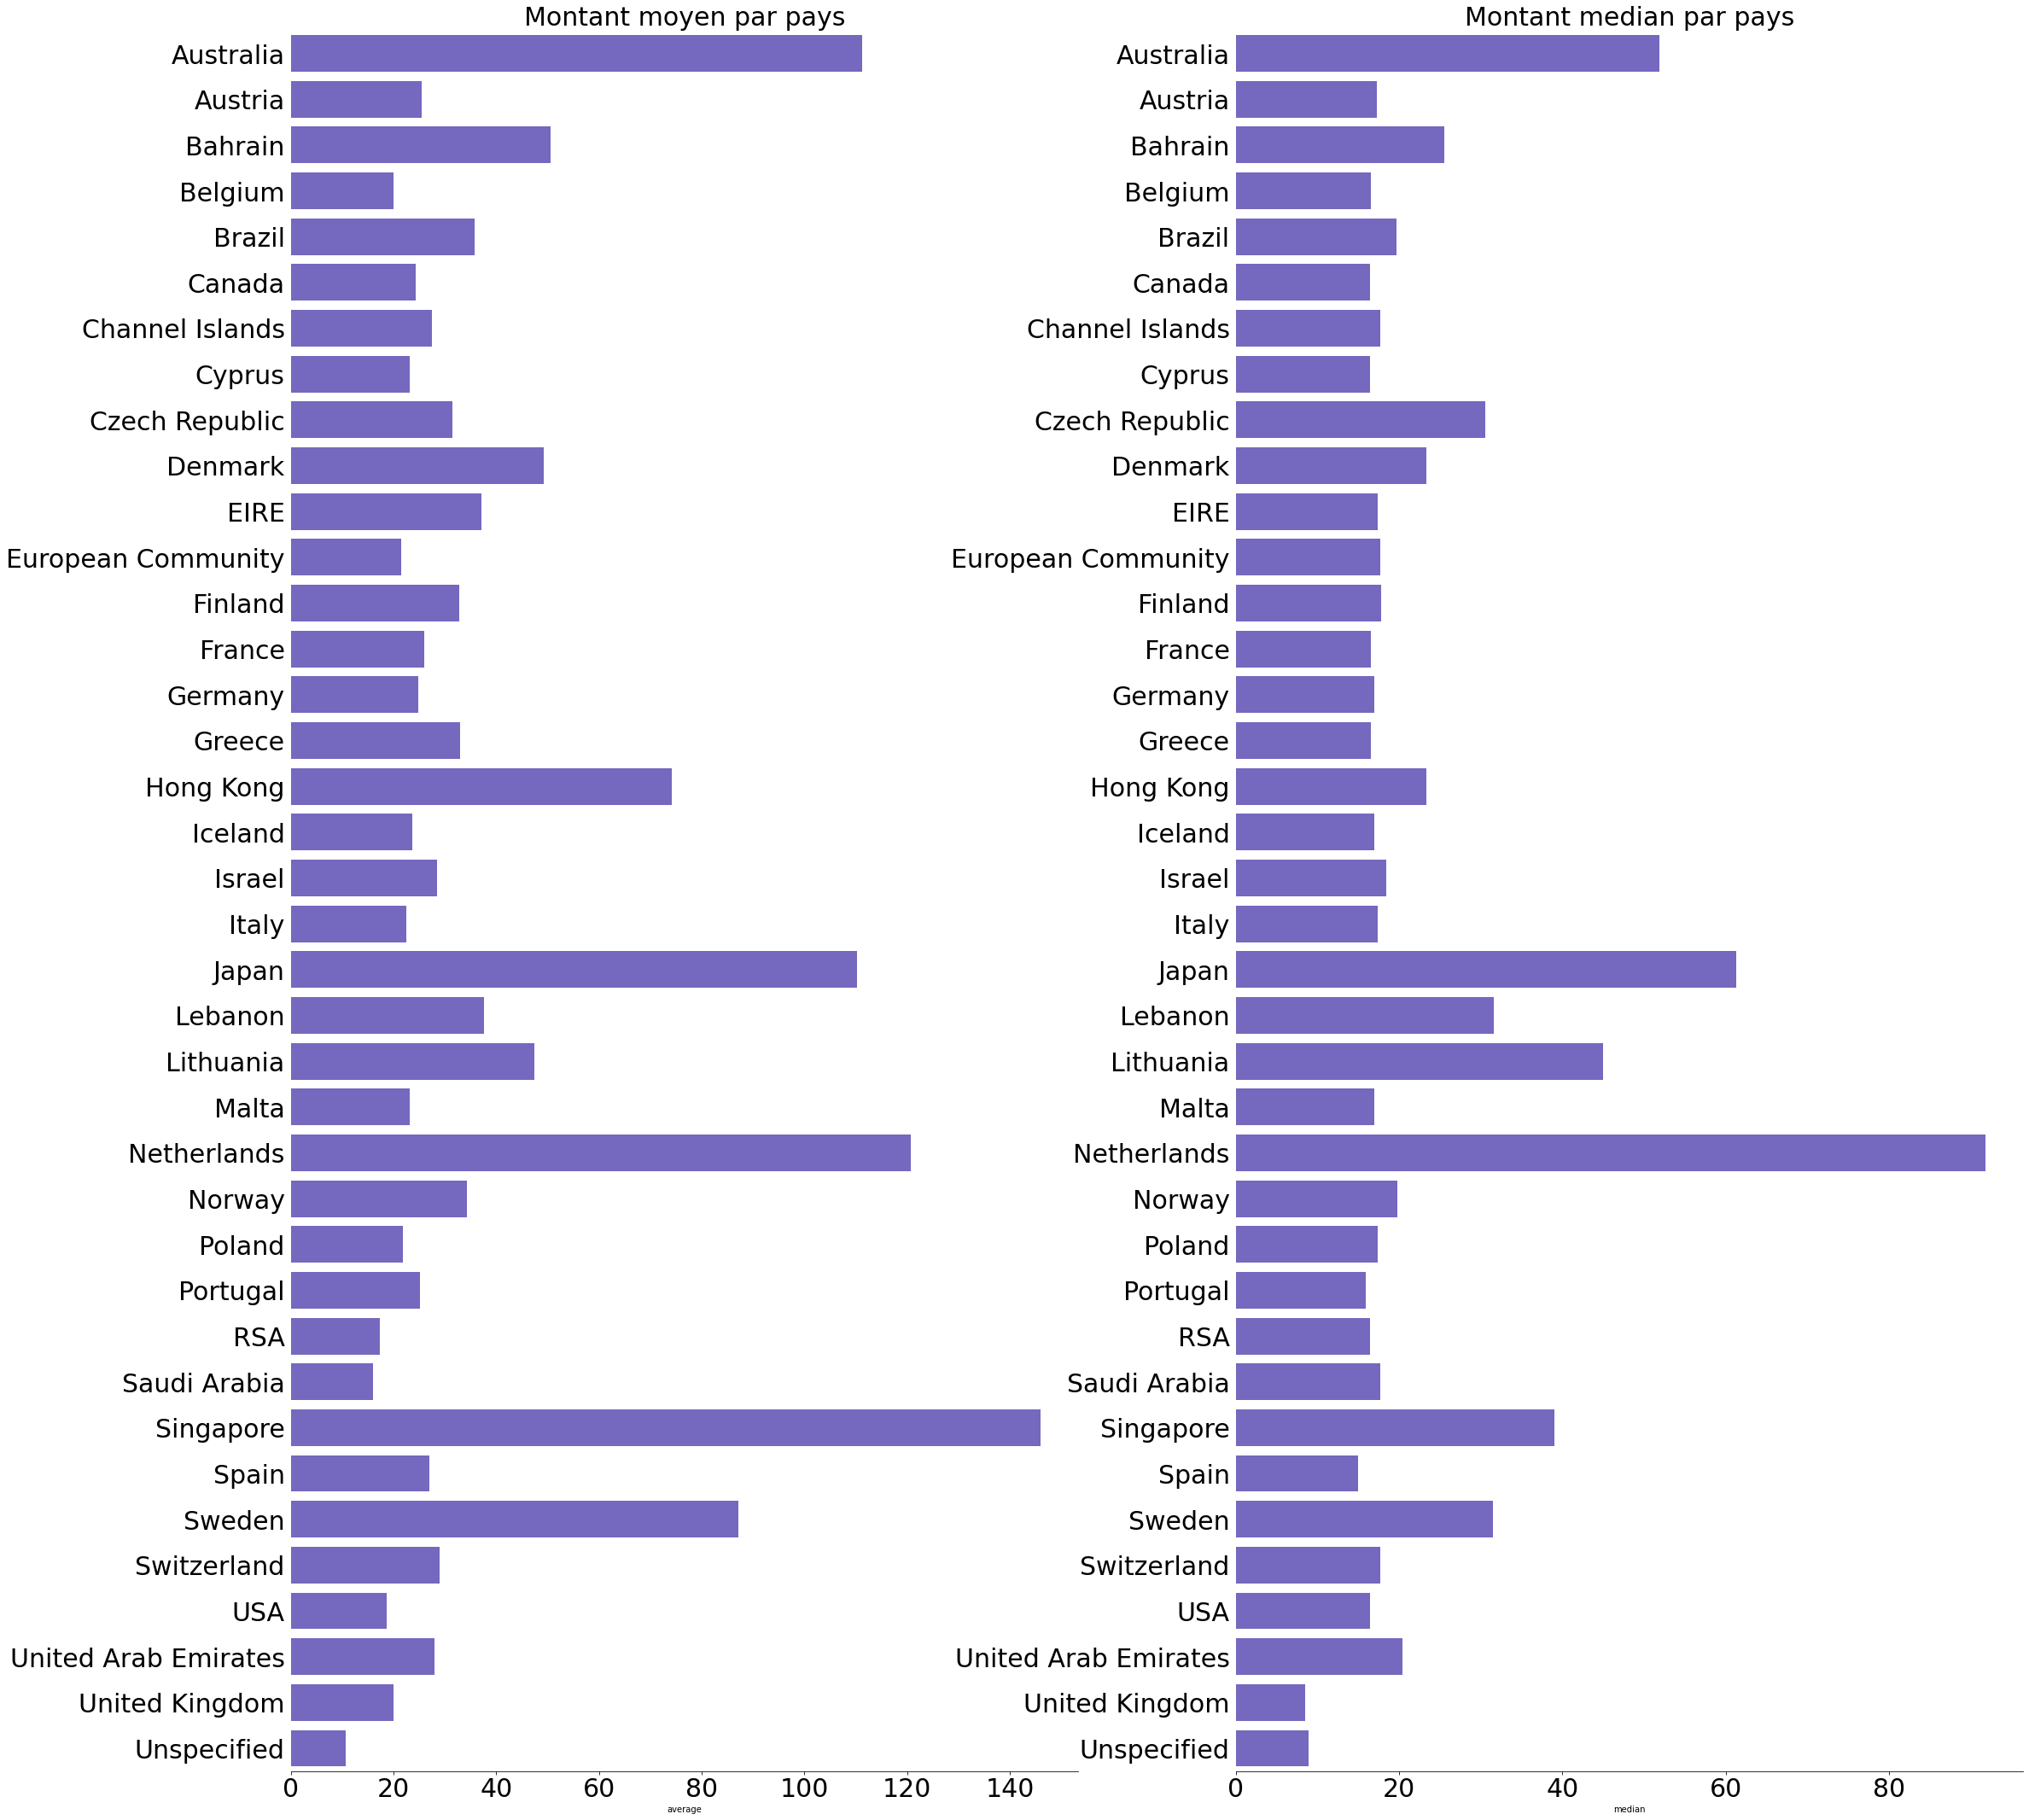

In [324]:
fig, ax = plt.subplots(figsize=(30,30))
fig.tight_layout(pad=5)

def plot_hor_bar(subplot, data):
    plt.subplot(1,2,subplot)
    if subplot==1:
        ax = sns.barplot(y='Country', x='average', data=data,
                     color='slateblue')
        plt.title("Montant moyen par pays",
          fontsize=30)
    else : 
        ax = sns.barplot(y='Country', x='median', data=data,
                     color='slateblue')
        plt.title("Montant median par pays",
          fontsize=30)
    plt.xticks(fontsize=30)
    plt.ylabel(None)
    plt.yticks(fontsize=30)
    sns.despine(left=True)
    ax.grid(False)
    ax.tick_params(bottom=True, left=False)
    return None

plot_hor_bar(1, montant[['Country', 'average']])
plot_hor_bar(2, montant[['Country', 'median']])

plt.show()

<H3 style="color:blue"> Question 3 - Volume </H3>

<h5 style="color: cadetblue">  top-5 produits les plus vendus durant le premier
trimestre 2011</h5>

In [81]:
top_5_products = """
    SELECT StockCode, sum(Quantity) as total_quantity
    FROM data
    where year=2011 and month between 1 and 3
    group by StockCode 
    order by total_quantity desc
    limit 5
"""

In [82]:
df_top_5_products = sqldf.run(top_5_products)

In [83]:
df_top_5_products

,StockCode,total_quantity
0,23166,148430
1,85099B,11220
2,21212,9479
3,85123A,9434
4,84077,8898


<h5 style="color: cadetblue">  top-5 produits les plus vendus durant le second
trimestre 2011</h5>

In [84]:
top_5_products_second_trimestre = """
    SELECT StockCode, sum(Quantity) as total_quantity
    FROM data
    where year=2011 and month between 4 and 6
    group by StockCode 
    order by total_quantity desc
    limit 5
"""

In [85]:
df_top_5_products_second_trimestre = sqldf.run(top_5_products_second_trimestre)

In [86]:
df_top_5_products_second_trimestre

,StockCode,total_quantity
0,23005,19402
1,84077,18462
2,85123A,15495
3,22197,10822
4,15036,9996


<H3 style="color:blue"> Question 4 - Montant </H3>

In [120]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,2010,12


<h5 style="color: cadetblue">  les 5 pays qui ont générés le plus gros chiffre d’affaire
pendant le premier trimestre 2011</h5>

In [130]:
CA_country = """
    SELECT Country, sum(Quantity * UnitPrice) as CA
    FROM data
    where year=2011 and month between 1 and 3
    group by Country 
    order by CA desc
"""

In [131]:
df_CA_country = sqldf.run(CA_country)

In [134]:
df_CA_country = df_CA_country.head(5)

In [146]:
df_CA_country

,Country,CA
0,United Kingdom,1402263.60
1,Netherlands,71959.76
2,EIRE,50113.89
3,Australia,40700.47
4,France,40458.88


<H3 style="color:blue"> Question 5 - Montant moyen et du montant médian d’un panier client pour chacun de ces cinq pays </H3>

In [166]:
df = data[(data['Country'].isin(df_CA_country.Country)) & (data['year']==2011) & (data['month'].between(1,3))]

In [167]:
df['cart_amount'] = df[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

/var/folders/0j/l37t0qrj7994qvgj06z5ybww0000gq/T/ipykernel_8981/3385646775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cart_amount'] = df[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)


In [242]:
df.head()

NameError: name 'df' is not defined

In [169]:
evol = pd.DataFrame()

In [171]:
evol['median'] = df.groupby(['Country', 'month'])['cart_amount'].apply(np.median)

In [172]:
evol['average'] = df.groupby(['Country', 'month'])['cart_amount'].mean()

In [174]:
evol = evol.reset_index()

In [186]:
evol_Australia = evol[evol['Country']=='Australia']

In [187]:
evol_EIRE = evol[evol['Country']=='EIRE']

In [188]:
evol_France = evol[evol['Country']=='France']

In [189]:
evol_Netherlands = evol[evol['Country']=='Netherlands']

In [191]:
evol_United_Kingdom = evol[evol['Country']=='United Kingdom']

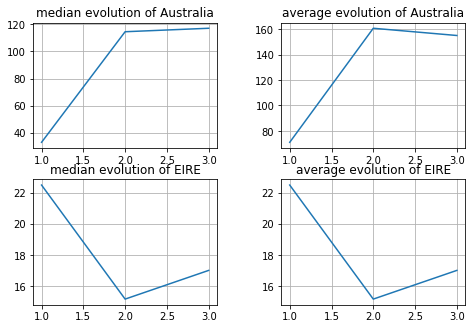

In [261]:
plt.figure()


#Australia
plt.subplot(221)
plt.plot(evol_Australia['month'], evol_Australia['median'])
plt.title('median evolution of Australia')
plt.grid(True)

plt.subplot(222)
plt.plot(evol_Australia['month'], evol_Australia['average'])
plt.title('average evolution of Australia')
plt.grid(True)

#EIRE
plt.subplot(223)
plt.plot(evol_EIRE['month'], evol_EIRE['median'])
plt.title('median evolution of EIRE')
plt.grid(True)

plt.subplot(224)
plt.plot(evol_EIRE['month'], evol_EIRE['median'])
plt.title('average evolution of EIRE')
plt.grid(True)

#France
#plt.subplot(225)
#plt.plot(evol_France['month'], evol_France['median'])
#plt.title('median evolution of France')
#plt.grid(True)

#plt.subplot(226)
#plt.plot(evol_France['month'], evol_France['median'])
#plt.title('average evolution of France')
#plt.grid(True)


#PLot
plt.subplots_adjust(top=1, bottom=0.02, left=1, right=2, hspace=0.25,
                    wspace=0.35)
plt.show()


<H3 style="color:blue"> Question 6 -  à quelle fréquence dépensent les 100 plus gros clients du RoyaumeUni </H3>

In [291]:
united_kingdom = """
    SELECT CustomerID, sum(Quantity) quantity
    FROM data
    where Country='United Kingdom'
    group by CustomerID 
    order by quantity desc
    limit 100
"""

In [292]:
united_kingdom = sqldf.run(united_kingdom)

In [241]:
united_kingdom.head()

NameError: name 'united_kingdom' is not defined

In [294]:
united_kingdom.quantity.mean()

16656.0

<H2 style="color: red; text-align:center"> Modèles</H2>

In [113]:
data_model = data[['InvoiceDate', 'UnitPrice', 'Quantity', 'Country', 'year', 'month', 'day']]

In [115]:
data_model['cart_amount'] = data_model[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)

/var/folders/0j/l37t0qrj7994qvgj06z5ybww0000gq/T/ipykernel_1371/4180836719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['cart_amount'] = data_model[['Quantity', 'UnitPrice']].apply(lambda x : (x['Quantity'] * x['UnitPrice']), 1)


In [116]:
data_model

,InvoiceDate,UnitPrice,Quantity,Country,year,month,day,cart_amount
0,2010-12-01,2.55,6,United Kingdom,2010,12,1,15.30
1,2010-12-01,3.39,6,United Kingdom,2010,12,1,20.34
2,2010-12-01,2.75,8,United Kingdom,2010,12,1,22.00
3,2010-12-01,3.39,6,United Kingdom,2010,12,1,20.34
4,2010-12-01,3.39,6,United Kingdom,2010,12,1,20.34
...,...,...,...,...,...,...,...,...
541904,2011-12-09,0.85,12,France,2011,12,9,10.20
541905,2011-12-09,2.10,6,France,2011,12,9,12.60
541906,2011-12-09,4.15,4,France,2011,12,9,16.60
541907,2011-12-09,4.15,4,France,2011,12,9,16.60


In [122]:
data_model = data_model.groupby(['InvoiceDate', 'year', 'month', 'day']).agg({'cart_amount':'sum'}).reset_index()

In [123]:
data_model

,InvoiceDate,year,month,day,cart_amount
0,2010-12-01,2010,12,1,59102.02
1,2010-12-02,2010,12,2,49170.52
2,2010-12-03,2010,12,3,48221.88
3,2010-12-05,2010,12,5,31755.63
4,2010-12-06,2010,12,6,55594.43
...,...,...,...,...,...
300,2011-12-05,2011,12,5,119611.48
301,2011-12-06,2011,12,6,59008.27
302,2011-12-07,2011,12,7,75678.49
303,2011-12-08,2011,12,8,83448.77


### Model training AND score

In [128]:
x = data_model[['year', 'month', 'day']]
y = data_model['cart_amount']

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [132]:
print("X_train = " , X_train.shape)
print("X_test = " , X_test.shape)
print("Y_train = " , Y_train.shape)
print("Y_test = " , Y_test.shape)

X_train =  (244, 3)
X_test =  (61, 3)
Y_train =  (244,)
Y_test =  (61,)


In [133]:
model = RandomForestRegressor()

In [145]:
rf = model.fit(X_train, Y_train)

In [148]:
predict = rf.predict(X_test)

In [149]:
rf.score(X_train, Y_train)

0.8391196534651948

In [151]:
predict

array([49726.9975 , 37494.38335, 42112.11932, 87946.2438 , 38537.0436 ,
       21565.8089 , 33354.0708 , 32983.4916 , 38350.7448 , 21070.41352,
       50305.0626 , 30494.9181 , 52846.8475 , 30379.3829 , 28545.4    ,
       33829.5299 , 35991.08941, 29482.6447 , 49478.8626 , 55961.4325 ,
       66403.461  , 43340.4523 , 26629.2768 , 29768.2164 , 23928.1539 ,
       49432.3597 , 27307.8038 , 33829.0376 , 46915.74   , 31424.2603 ,
       19656.4895 , 28322.1172 , 23334.5593 , 24096.8113 , 23998.7873 ,
       23266.3677 , 24707.48615, 36555.0714 , 62610.8036 , 83285.3949 ,
       24025.8791 , 27209.6548 , 26294.9586 , 34869.04337, 34276.9649 ,
       27155.6199 , 22614.4378 , 21514.2529 , 30663.085  , 25584.6282 ,
       39057.8098 , 24101.6803 , 24540.8564 , 40880.8245 , 29165.9428 ,
       40308.7438 , 31846.819  , 48694.0286 , 20200.0941 , 36011.4447 ,
       38702.8065 ])

In [154]:
np.array(Y_test)

array([ 29505.5  ,  41749.67 ,  44059.1  ,  60739.03 ,  19412.73 ,
        26623.36 ,  43356.56 ,  26777.23 ,  24450.42 ,  51933.44 ,
        59102.02 ,  49203.22 ,  67222.   ,  26368.32 ,  25542.95 ,
        37211.45 ,  67013.35 ,  79824.56 ,  34094.74 ,  29339.74 ,
        59943.73 , 116516.18 ,  40709.61 ,  22588.89 ,  31671.46 ,
        32217.74 ,  23602.98 ,  28953.83 ,  21657.41 ,  55359.9  ,
         5823.71 ,  48882.58 ,  45726.27 ,  33500.42 ,  34629.39 ,
        20284.89 ,  33785.47 ,  25339.42 ,  61001.55 ,  31755.63 ,
        16307.38 ,  22954.9  ,  60750.18 ,  29937.141,  41178.14 ,
         6270.26 ,  32063.18 ,  30058.5  ,  21345.92 ,  47754.22 ,
        54940.36 ,  63820.39 ,   9483.6  ,  27603.81 ,  40569.74 ,
        22503.65 ,  19370.48 ,  31385.3  ,  26351.99 ,   6962.23 ,
        56655.15 ])

In [157]:
rf.score(np.array(Y_test), predict)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 29505.5   41749.67  44059.1   60739.03  19412.73  26623.36  43356.56
  26777.23  24450.42  51933.44  59102.02  49203.22  67222.    26368.32
  25542.95  37211.45  67013.35  79824.56  34094.74  29339.74  59943.73
 116516.18  40709.61  22588.89  31671.46  32217.74  23602.98  28953.83
  21657.41  55359.9    5823.71  48882.58  45726.27  33500.42  34629.39
  20284.89  33785.47  25339.42  61001.55  31755.63  16307.38  22954.9
  60750.18  29937.14  41178.14   6270.26  32063.18  30058.5   21345.92
  47754.22  54940.36  63820.39   9483.6   27603.81  40569.74  22503.65
  19370.48  31385.3   26351.99   6962.23  56655.15].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--- 

### Prédiction

In [211]:
model = RandomForestRegressor()

In [212]:
rf = model.fit(x, y)

In [222]:
list_day = [i for i in range(10,32)]
list_day.append(3)

In [223]:
data_december = pd.DataFrame.from_dict({'year': [2011 for i in range(len(list_day))],
                'month': [12 for i in range(len(list_day))],
                'day': list_day
                })

In [224]:
data_december

,year,month,day
0,2011,12,10
1,2011,12,11
2,2011,12,12
3,2011,12,13
4,2011,12,14
5,2011,12,15
6,2011,12,16
7,2011,12,17
8,2011,12,18
9,2011,12,19


In [240]:
data_december_final.head()

,year,month,day,cart_amount
0,2011,12,1,52854.93
1,2011,12,2,58054.49
2,2011,12,4,24533.12
3,2011,12,5,119611.48
4,2011,12,6,59008.27


In [226]:
data_december_final = data_december.copy(deep=True)

In [227]:
data_december_final['cart_amount']=rf.predict(data_december)

In [228]:
data_december_final.head()

,year,month,day,cart_amount
0,2011,12,10,165678.3482
1,2011,12,11,146191.9478
2,2011,12,12,91859.4226
3,2011,12,13,93012.5712
4,2011,12,14,116406.9269


In [229]:
data_model_december = data_model[(data_model['year']==2011) & (data_model['month']==12)][['year', 'month', 'day','cart_amount']]

In [230]:
data_december_final = pd.concat([data_model_december, data_december_final], ignore_index=True)

In [231]:
data_december_final.sort_values('day')

,year,month,day,cart_amount
0,2011,12,1,52854.9300
1,2011,12,2,58054.4900
30,2011,12,3,57022.7572
2,2011,12,4,24533.1200
3,2011,12,5,119611.4800
4,2011,12,6,59008.2700
5,2011,12,7,75678.4900
6,2011,12,8,83448.7700
7,2011,12,9,369690.0500
8,2011,12,10,165678.3482


In [239]:
print("le CA en décembre 2011 sera de : " +  str(data_december_final.cart_amount.sum()))

le CA en décembre 2011 sera de : 2760812.9959000004
